# Optimizitation Project - Index Tracking & Enhanced Indexation

### Package and Data loading

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from typing import Dict, List, Optional
import matplotlib.pyplot as plt
import seaborn as sns


We selescted the CAC 40 as the reference index, the index contains the 40 largest comapanies on teh Paris stock exchange based on their market capitalisation.

In [4]:
INDEX_CONSTITUENTS = {
    'CAC40': {
        'ticker': '^FCHI',
        'constituents': [
            'AIR.PA', 'AI.PA', 'MT.AS', 'CS.PA', 'BNP.PA', 'EN.PA', 
            'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA', 'DSY.PA', 'ENGI.PA',
            'EL.PA', 'ERF.PA', 'RMS.PA', 'KER.PA', 'LR.PA', 'OR.PA',
            'MC.PA', 'ML.PA', 'ORA.PA', 'RI.PA', 'PUB.PA', 'RNO.PA',
            'SAF.PA', 'SGO.PA', 'SAN.PA', 'SU.PA', 'GLE.PA', 'STLAP.PA',
            'STMPA.PA', 'TEP.PA', 'HO.PA', 'FP.PA', 'URW.AS', 'VIE.PA',
            'DG.PA', 'VIV.PA', 'WLN.PA', 'ALO.PA'
        ]
    }
}

The function below uses yahoo finance native python package to load daily financial data about the index and its constituents, such as the opening and closing price, the volume of transaction, the high and low.

In [43]:
def get_index_data(index_name: str,
                   period: str = '5y',
                   constituents: Optional[List[str]] = None) -> pd.DataFrame:
    """
    Fetch daily OHLCV data for an index and its constituents, and return a single DataFrame:
    columns = ['name', 'date', 'open', 'high', 'low', 'close', 'volume']
    """
    index_name = index_name.upper()

    if index_name not in INDEX_CONSTITUENTS:
        raise ValueError(f"Index '{index_name}' not supported. "
                         f"Available: {list(INDEX_CONSTITUENTS.keys())}")

    index_ticker = INDEX_CONSTITUENTS[index_name]['ticker']
    if constituents is None:
        constituents = INDEX_CONSTITUENTS[index_name]['constituents']

    all_rows = []

    def fetch_and_append(ticker, label):
        try:
            df = yf.Ticker(ticker).history(period=period)[['Open','High','Low','Close','Volume']]
            df = df.reset_index().rename(columns=str.lower)
            df['name'] = label
            all_rows.append(df[['name','date','open','high','low','close','volume']])
            print(f"✓ {label}")
        except Exception as e:
            print(f"✗ {label} - {e}")

    # Index itself
    print(f"Fetching index: {index_name}")
    fetch_and_append(index_ticker, index_name)

    # Constituents
    print(f"Fetching {len(constituents)} constituents...")
    for t in constituents:
        fetch_and_append(t, t)

    # Combine all
    big_df = pd.concat(all_rows, ignore_index=True)
    print(f"\nFinal dataset: {big_df['name'].nunique()} assets, {len(big_df):,} rows")

    return big_df


In [44]:
value_df = get_index_data('CAC40', period='1y')

Fetching index: CAC40
✓ CAC40
Fetching 40 constituents...
✓ AIR.PA
✓ AI.PA
✓ MT.AS
✓ CS.PA
✓ BNP.PA
✓ EN.PA
✓ CAP.PA
✓ CA.PA
✓ ACA.PA
✓ BN.PA
✓ DSY.PA
✓ ENGI.PA
✓ EL.PA
✓ ERF.PA
✓ RMS.PA
✓ KER.PA
✓ LR.PA
✓ OR.PA
✓ MC.PA
✓ ML.PA
✓ ORA.PA
✓ RI.PA
✓ PUB.PA
✓ RNO.PA
✓ SAF.PA
✓ SGO.PA
✓ SAN.PA
✓ SU.PA
✓ GLE.PA
✓ STLAP.PA
✓ STMPA.PA
✓ TEP.PA
✓ HO.PA


$FP.PA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$URW.AS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


✓ FP.PA
✓ URW.AS
✓ VIE.PA
✓ DG.PA
✓ VIV.PA
✓ WLN.PA
✓ ALO.PA

Final dataset: 39 assets, 9,984 rows


In [45]:
# We add a column daily return calcualting the difference in % between the closing price of the day d and the closing price at d-1

value_df.sort_values(['name', 'date'])
value_df['daily_return_pct'] = value_df.groupby('name')['close'].pct_change() * 100
value_df


,name,date,open,high,low,close,volume,daily_return_pct
0,CAC40,2024-10-24 00:00:00+02:00,7527.640137,7565.390137,7503.020020,7503.279785,63318800.0,NaN
1,CAC40,2024-10-25 00:00:00+02:00,7489.870117,7518.750000,7459.410156,7497.540039,50453400.0,-0.076496
2,CAC40,2024-10-28 00:00:00+01:00,7542.129883,7580.680176,7494.930176,7556.939941,53209700.0,0.792259
3,CAC40,2024-10-29 00:00:00+01:00,7593.859863,7618.319824,7506.520020,7511.109863,55427600.0,-0.606463
4,CAC40,2024-10-30 00:00:00+01:00,7452.100098,7470.689941,7377.390137,7428.359863,69878300.0,-1.101701
...,...,...,...,...,...,...,...,...
9979,ALO.PA,2025-10-20 00:00:00+02:00,21.910000,22.049999,21.700001,21.770000,544769.0,-0.274849
9980,ALO.PA,2025-10-21 00:00:00+02:00,21.770000,21.799999,21.430000,21.610001,602243.0,-0.734956
9981,ALO.PA,2025-10-22 00:00:00+02:00,21.910000,22.090000,21.420000,21.629999,1100387.0,0.092543
9982,ALO.PA,2025-10-23 00:00:00+02:00,21.629999,21.990000,21.629999,21.780001,710983.0,0.693488


### Exploratory Data Analysis (EDA)

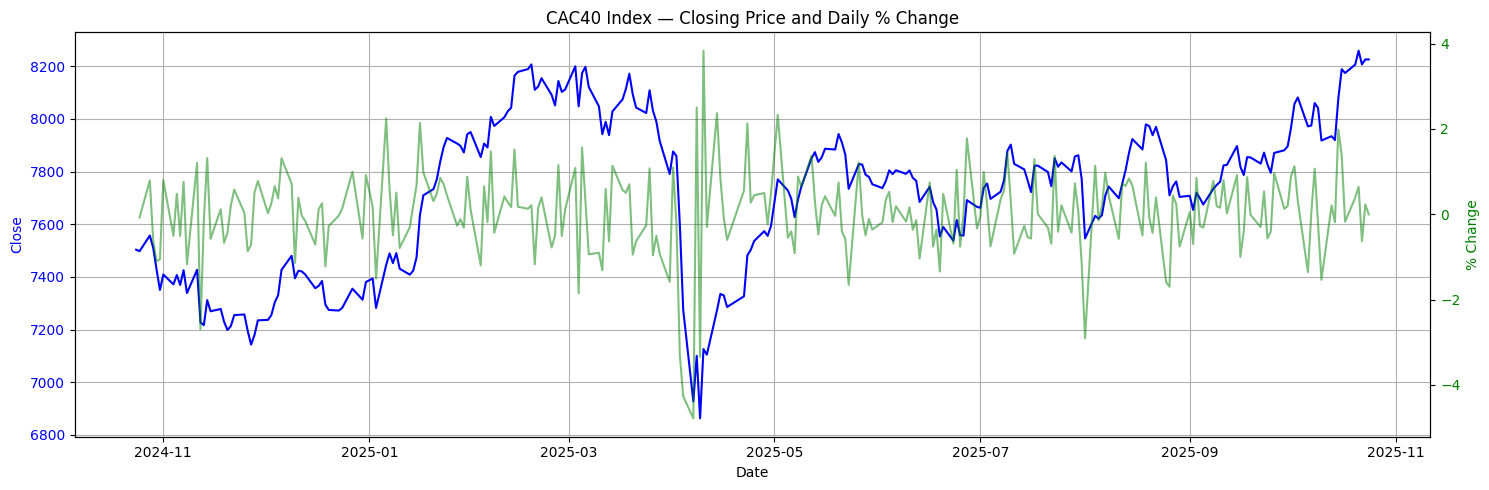

In [46]:
index_df = value_df[value_df['name'] == 'CAC40'].copy()
index_df['pct_change'] = index_df['close'].pct_change() * 100

fig, ax1 = plt.subplots(figsize=(15,5))

# Plot close price on left y-axis
ax1.plot(index_df['date'], index_df['close'], color='b', label='Close Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Close", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Plot daily % change on right y-axis
ax2 = ax1.twinx()
ax2.plot(index_df['date'], index_df['pct_change'], color='g', label='Daily % Change', alpha=0.5)
ax2.set_ylabel('% Change', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title("CAC40 Index — Closing Price and Daily % Change")
fig.tight_layout()
plt.show()


#### Correlation Matrix

name                         ACA.PA     AI.PA    AIR.PA    ALO.PA     BN.PA  \
date                                                                          
2024-10-24 00:00:00+02:00       NaN       NaN       NaN       NaN       NaN   
2024-10-25 00:00:00+02:00 -0.462132 -0.273968 -0.453515  1.581808  0.030411   
2024-10-28 00:00:00+01:00  0.749997  1.624461 -0.427094 -1.265199  2.523563   
2024-10-29 00:00:00+01:00  0.106342 -0.811005  0.328844  0.049277 -0.563469   
2024-10-30 00:00:00+01:00 -0.956088 -1.706368 -0.427532 -0.985216 -1.282433   
...                             ...       ...       ...       ...       ...   
2025-10-20 00:00:00+02:00 -0.818679  0.243026  1.646708 -0.274849  0.232199   
2025-10-21 00:00:00+02:00 -0.275146 -0.115454  1.791855 -0.734956  0.411840   
2025-10-22 00:00:00+02:00  0.245254 -0.369856 -0.747530  0.092543  0.820312   
2025-10-23 00:00:00+02:00  0.244642  0.278429  0.704566  0.693488 -0.533951   
2025-10-24 00:00:00+02:00 -0.335572 -0.219808  0.579

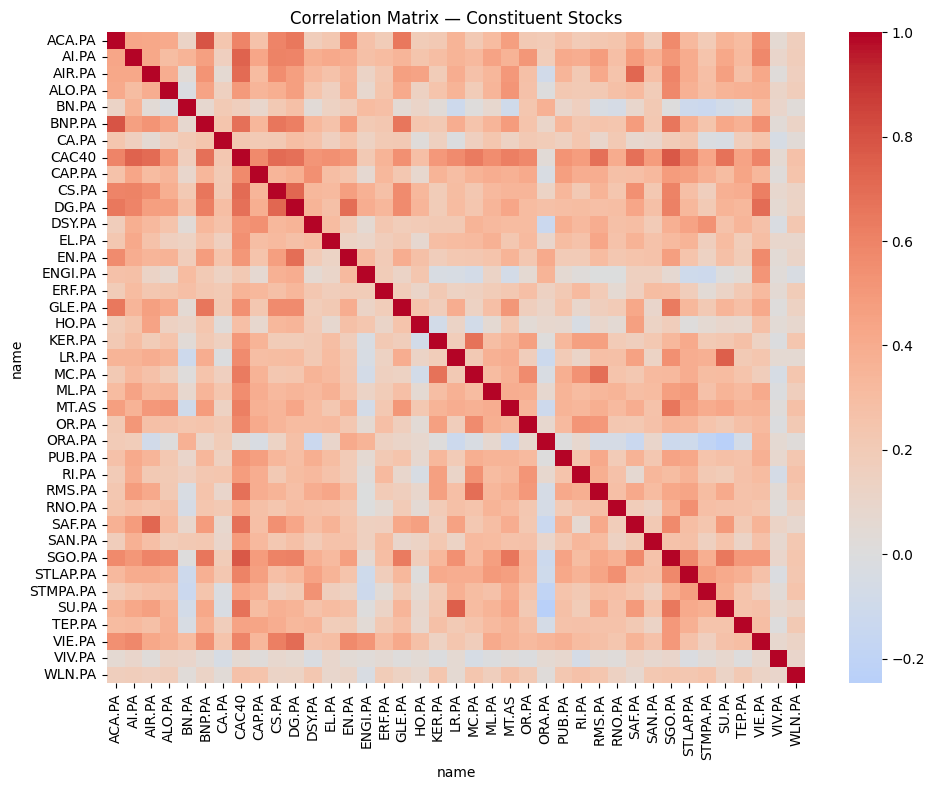

In [30]:
pivot_close = value_df.pivot(index='date', columns='name', values='daily_return_pct')
print(pivot_close)
# Drop the index column (keep only stocks)
# pivot_stocks = pivot_close.drop(columns=['CAC40'], errors='ignore')

# Compute correlations (daily closes)
corr = pivot_close.corr()
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix — Constituent Stocks")
plt.tight_layout()
plt.show()

### R² Score (Coefficient of Determination)

The **R² score** measures how well a stock’s returns can be explained by the index returns in a linear regression. In index tracking, it quantifies how closely a stock tracks the index.


Let $(y_i)$ be the actual stock returns and $(\hat{y}\_i)$ the predicted values from a linear regression on the index returns.

The coefficient of determination is

$$
R^2 \;=\; 1 \;-\; \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Where:

- $\mathrm{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$ — **Residual Sum of Squares** (unexplained variance)  
- $\mathrm{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ — **Total Sum of Squares** (total variance)  
- $\bar{y}$ — mean of the actual values $(y_i)$

##### Interpretation

- \($R^2$ = 1\): Stock returns **perfectly track** index returns (all variation explained).  
- \($R^2$ = 0\): Stock returns are **unrelated** to index returns (no variation explained).  
- Higher $(R^2)$ → Better tracking.




In [31]:
returns = value_df.pivot(index='date', columns='name', values='close').pct_change().dropna()
index_name = 'CAC40'  # Replace as needed
index_returns = returns[index_name]
stock_names = [col for col in returns.columns if col != index_name]

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
r2_results = []
for stock in stock_names:
    X = index_returns.values.reshape(-1, 1)
    y = returns[stock].values
    reg = LinearRegression().fit(X, y)
    r2 = r2_score(y, reg.predict(X))
    r2_results.append({'stock': stock, 'r2': r2})

r2_df = pd.DataFrame(r2_results)
r2_df = r2_df.sort_values('r2', ascending=False)  # Highest R² at the top
print(r2_df.head(10))  # Top 10 stocks by R²

     stock        r2
30  SGO.PA  0.603474
1    AI.PA  0.539925
8    CS.PA  0.500457
2   AIR.PA  0.496080
26  RMS.PA  0.469639
5   BNP.PA  0.466842
28  SAF.PA  0.465379
9    DG.PA  0.460417
33   SU.PA  0.458423
19   MC.PA  0.397657


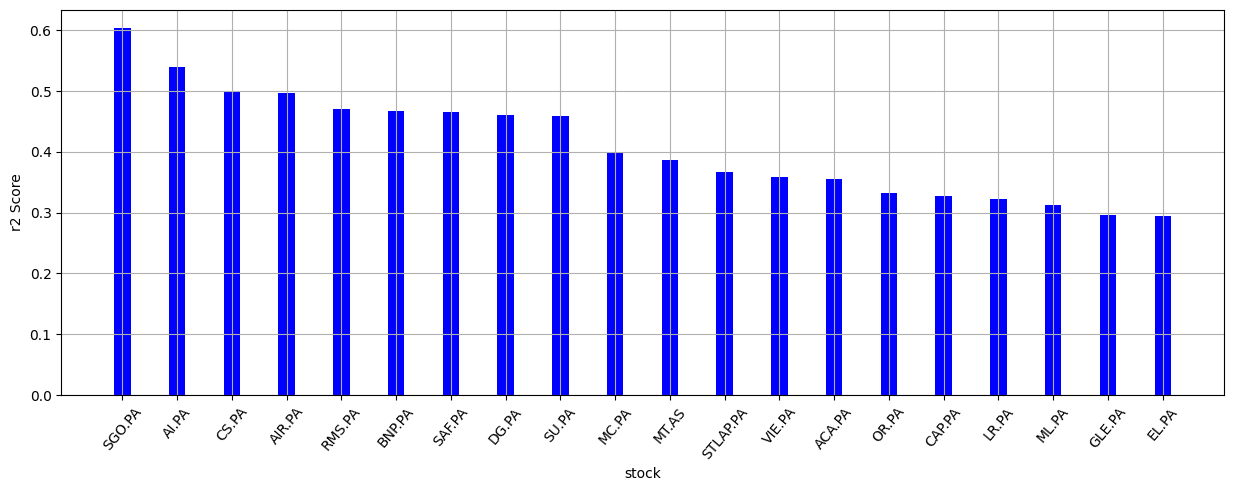

In [34]:
r2_df = r2_df.sort_values('r2',ascending=False).head(20)
fig, ax1 = plt.subplots(figsize=(15,5))

# Plot close price on left y-axis
ax1.bar(r2_df['stock'], r2_df['r2'], color='b', label='r2 Score', width=0.3)
ax1.set_xlabel("stock")
ax1.set_ylabel("r2 Score", color='black', )
ax1.tick_params(axis='x', labelcolor='black', rotation=50)
ax1.grid(True)

Top 10 stocks by R² score:
['SGO.PA', 'AI.PA', 'CS.PA', 'AIR.PA', 'RMS.PA', 'BNP.PA', 'SAF.PA', 'DG.PA', 'SU.PA', 'MC.PA']


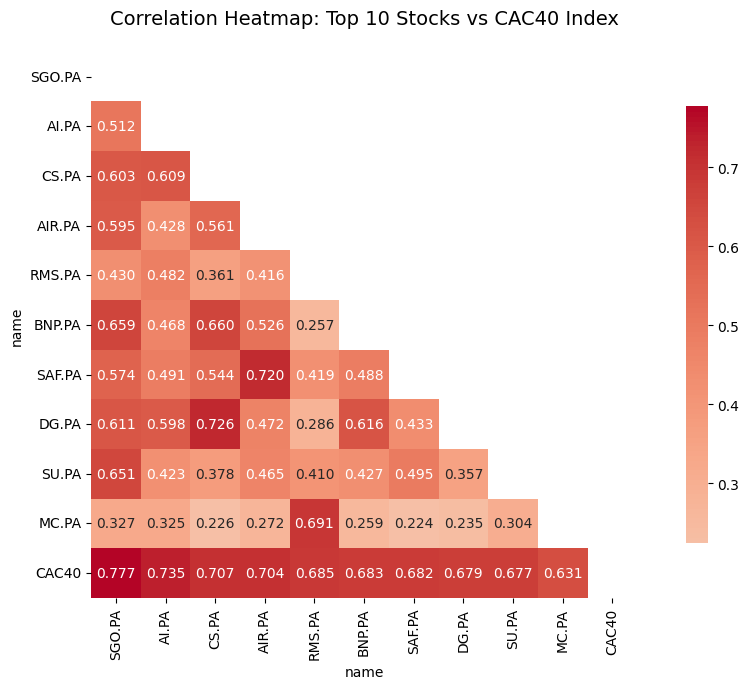

In [35]:
# Get the top 10 stocks from your R² analysis
top_10_stocks = r2_df.head(10)['stock'].tolist()
print("Top 10 stocks by R² score:")
print(top_10_stocks)

# Create correlation heatmap for top 10 stocks vs index
top_10_data = pivot_close[top_10_stocks + ['CAC40']]

# Calculate correlation matrix
corr_top10 = top_10_data.corr()

# Create heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(corr_top10, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_top10, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap: Top 10 Stocks vs CAC40 Index", fontsize=14, pad=20)
plt.tight_layout()
plt.show()



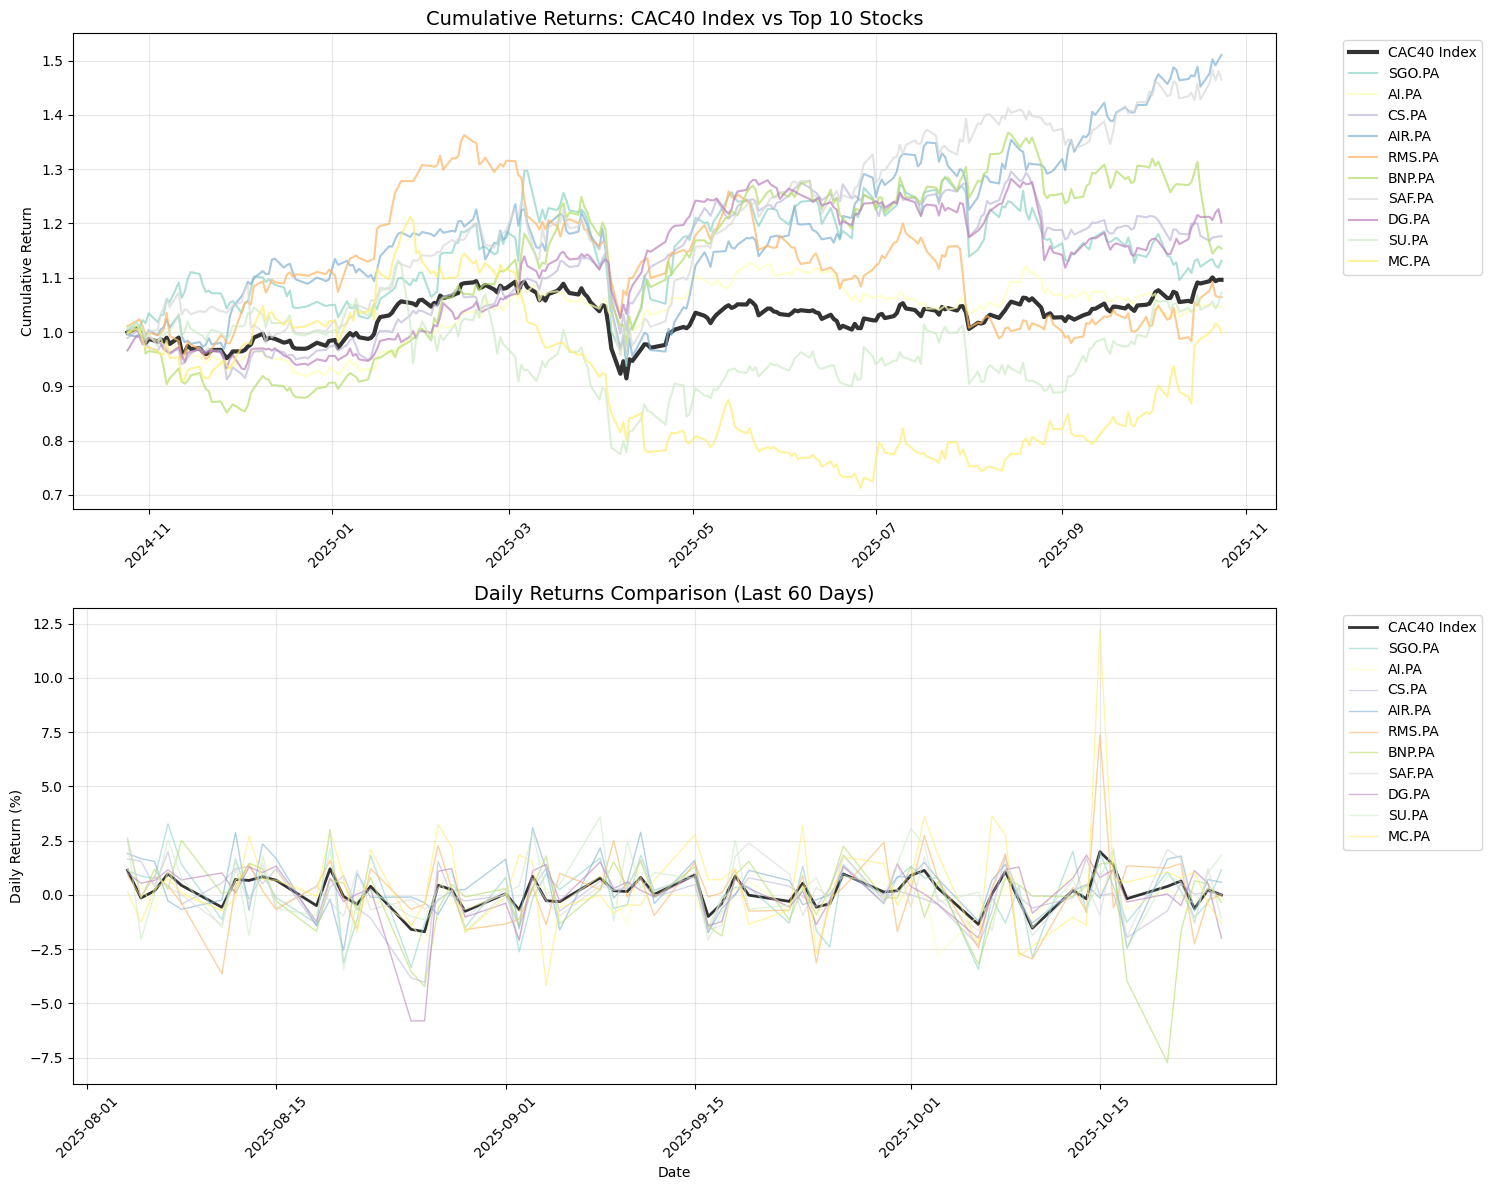

In [36]:
# Plot daily returns comparison
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Index vs Top 10 stocks cumulative returns
cumulative_returns = (1 + top_10_data / 100).cumprod()

# Plot CAC40 index
axes[0].plot(cumulative_returns.index, cumulative_returns['CAC40'], 
             linewidth=3, color='black', label='CAC40 Index', alpha=0.8)

# Plot top 10 stocks
colors = plt.cm.Set3(np.linspace(0, 1, 10))
for i, stock in enumerate(top_10_stocks):
    axes[0].plot(cumulative_returns.index, cumulative_returns[stock], 
                 linewidth=1.5, color=colors[i], label=stock, alpha=0.7)

axes[0].set_title("Cumulative Returns: CAC40 Index vs Top 10 Stocks", fontsize=14)
axes[0].set_ylabel("Cumulative Return")
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Daily returns comparison (zoomed view)
# Take last 60 days for better visibility
recent_data = top_10_data.tail(60)

# Plot CAC40 daily returns
axes[1].plot(recent_data.index, recent_data['CAC40'], 
             linewidth=2, color='black', label='CAC40 Index', alpha=0.8)

# Plot top 10 stocks daily returns
for i, stock in enumerate(top_10_stocks):
    axes[1].plot(recent_data.index, recent_data[stock], 
                 linewidth=1, color=colors[i], label=stock, alpha=0.6)

axes[1].set_title("Daily Returns Comparison (Last 60 Days)", fontsize=14)
axes[1].set_ylabel("Daily Return (%)")
axes[1].set_xlabel("Date")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

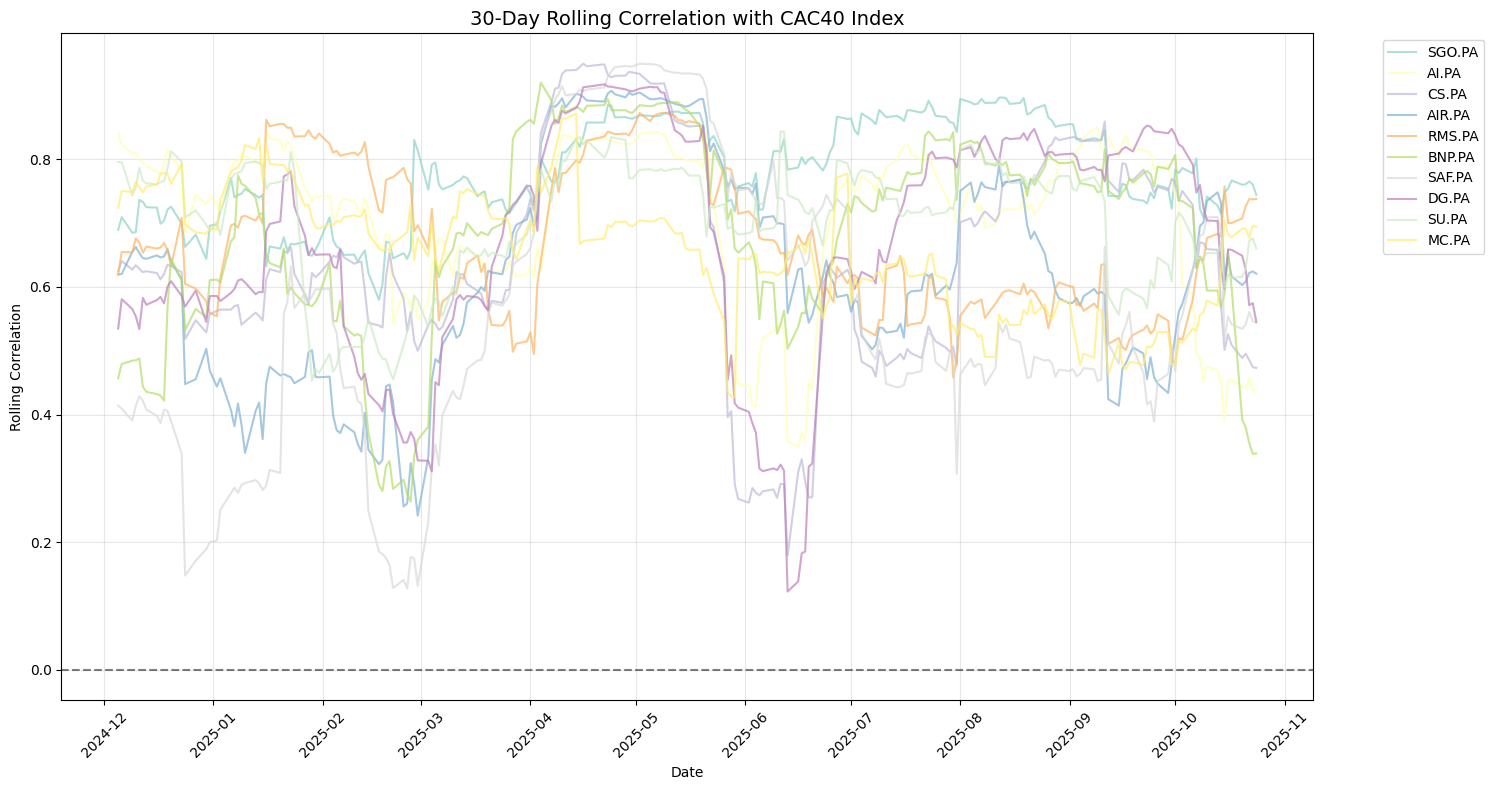


=== SUMMARY STATISTICS ===
 Stock  R² Score  Mean Return (%)  Std Return (%)  Sharpe Ratio  Correlation with CAC40
SGO.PA    0.6035           0.0694          2.0521        0.0338                  0.7768
 AI.PA    0.5399           0.0239          1.1246        0.0213                  0.7348
 CS.PA    0.5005           0.0732          1.3660        0.0536                  0.7074
AIR.PA    0.4961           0.1770          1.7402        0.1017                  0.7043
RMS.PA    0.4696           0.0384          1.6742        0.0229                  0.6853
BNP.PA    0.4668           0.0718          1.7729        0.0405                  0.6833
SAF.PA    0.4654           0.1646          1.7136        0.0961                  0.6822
 DG.PA    0.4604           0.0805          1.2908        0.0624                  0.6785
 SU.PA    0.4584           0.0512          2.1700        0.0236                  0.6771
 MC.PA    0.3977           0.0212          2.1091        0.0101                  0.6306


In [37]:
fig, ax = plt.subplots(figsize=(15, 8))

# Calculate 30-day rolling correlation for each stock with CAC40
window = 30
for i, stock in enumerate(top_10_stocks):
    rolling_corr = top_10_data[stock].rolling(window).corr(top_10_data['CAC40'])
    ax.plot(rolling_corr.index, rolling_corr, 
            linewidth=1.5, color=colors[i], label=stock, alpha=0.7)

ax.set_title(f"{window}-Day Rolling Correlation with CAC40 Index", fontsize=14)
ax.set_ylabel("Rolling Correlation")
ax.set_xlabel("Date")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n=== SUMMARY STATISTICS ===")
summary_stats = []

for stock in top_10_stocks:
    stats = {
        'Stock': stock,
        'R² Score': r2_df[r2_df['stock'] == stock]['r2'].iloc[0],
        'Mean Return (%)': top_10_data[stock].mean(),
        'Std Return (%)': top_10_data[stock].std(),
        'Sharpe Ratio': top_10_data[stock].mean() / top_10_data[stock].std(),
        'Correlation with CAC40': top_10_data[stock].corr(top_10_data['CAC40'])
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df.round(4)
print(summary_df.to_string(index=False))

### Asset Allocation

##### Methodology Overview
The sparse portfolio selection method uses L1-regularization (Lasso) to select a subset of stocks that best track an index while maintaining sparsity. The key idea is to solve an optimization problem that minimizes tracking error while penalizing the number of selected stocks.
##### Mathematical Formulation
For stock selection, we solve:
$$\min_{w} \frac{1}{2} \|R_{index} - R_{stocks} \cdot w\|_2^2 + \lambda \|w\|_1$$
Where:

$R_{index}$ = index returns vector
$R_{stocks}$ = matrix of individual stock returns
$w$ = portfolio weights vector (sparse)
$\lambda$ = regularization parameter controlling sparsity
$\|w\|_1$ = L1 penalty promoting sparsity

In [38]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def sparse_portfolio_selection(value_df, alpha_range=None, cv_folds=5):
    """
    Sparse Portfolio Selection using L1-regularized regression
    
    Parameters:
    -----------
    value_df : pd.DataFrame
        DataFrame with columns: ['name', 'date', 'close', 'daily_return_pct']
    alpha_range : array-like, optional
        Range of alpha values to test
    cv_folds : int, default=5
        Number of cross-validation folds
        
    Returns:
    --------
    results : dict
        Dictionary containing analysis results
    """
    
    # Prepare data
    returns = value_df.pivot(index='date', columns='name', values='daily_return_pct').dropna()
    index_name = 'CAC40'
    index_returns = returns[index_name].values
    stock_names = [col for col in returns.columns if col != index_name]
    stock_returns = returns[stock_names].values
    
    print(f"Data shape: {stock_returns.shape}")
    print(f"Number of stocks: {len(stock_names)}")
    print(f"Number of time periods: {len(index_returns)}")
    
    # Initialize and fit model
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(stock_returns)
    
    tscv = TimeSeriesSplit(n_splits=cv_folds)
    alphas = alpha_range if alpha_range is not None else np.logspace(-4, 1, 50)
    
    model = LassoCV(alphas=alphas, cv=tscv, random_state=42, max_iter=2000)
    model.fit(X_scaled, index_returns)
    
    # Get results
    weights = model.coef_
    selected_stocks = np.where(np.abs(weights) > 1e-6)[0]
    selected_stock_names = [stock_names[i] for i in selected_stocks]
    
    # Calculate metrics
    predicted_returns = model.predict(X_scaled)
    tracking_error = np.sqrt(np.mean((index_returns - predicted_returns)**2))
    r2_score = model.score(X_scaled, index_returns)
    
    # Create weights DataFrame
    weights_df = pd.DataFrame({
        'stock': selected_stock_names,
        'weight': weights[selected_stocks]
    }).sort_values('weight', key=abs, ascending=False)
    
    results = {
        'selected_stocks': selected_stock_names,
        'weights': weights_df,
        'tracking_error': tracking_error,
        'r2_score': r2_score,
        'optimal_alpha': model.alpha_,
        'n_selected': len(selected_stocks),
        'model': model,
        'scaler': scaler,
        'stock_names': stock_names,
        'stock_returns': stock_returns,
        'index_returns': index_returns
    }
    
    return results

def plot_sparse_results(results):
    """
    Plot results of sparse portfolio selection
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Selected stocks weights
    weights_df = results['weights']
    axes[0, 0].bar(range(len(weights_df)), weights_df['weight'])
    axes[0, 0].set_title(f'Selected Stocks Weights (n={len(weights_df)})')
    axes[0, 0].set_xlabel('Stock Index')
    axes[0, 0].set_ylabel('Weight')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Alpha path
    model = results['model']
    axes[0, 1].semilogx(model.alphas_, model.mse_path_.mean(axis=1))
    axes[0, 1].axvline(model.alpha_, color='red', linestyle='--', 
                      label=f'Optimal α = {model.alpha_:.4f}')
    axes[0, 1].set_title('Cross-Validation Score vs Alpha')
    axes[0, 1].set_xlabel('Alpha')
    axes[0, 1].set_ylabel('Mean Squared Error')
    axes[0, 1].legend()
    
    # Plot 3: Number of selected stocks vs alpha
    n_features = []
    alphas = model.alphas_
    for alpha in alphas:
        temp_model = Lasso(alpha=alpha, max_iter=2000)
        temp_model.fit(results['scaler'].transform(results['stock_returns']), results['index_returns'])
        n_features.append(np.sum(np.abs(temp_model.coef_) > 1e-6))
    
    axes[1, 0].semilogx(alphas, n_features)
    axes[1, 0].axvline(model.alpha_, color='red', linestyle='--')
    axes[1, 0].set_title('Number of Selected Stocks vs Alpha')
    axes[1, 0].set_xlabel('Alpha')
    axes[1, 0].set_ylabel('Number of Selected Stocks')
    
    # Plot 4: Summary statistics
    axes[1, 1].text(0.1, 0.8, f"Selected Stocks: {results['n_selected']}", 
                    transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].text(0.1, 0.7, f"R² Score: {results['r2_score']:.4f}", 
                    transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].text(0.1, 0.6, f"Tracking Error: {results['tracking_error']:.4f}", 
                    transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].text(0.1, 0.5, f"Optimal Alpha: {results['optimal_alpha']:.6f}", 
                    transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].set_title('Summary Statistics')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Usage example:
def run_analysis(value_df):
    """
    Run complete sparse selection analysis
    """
    # Run sparse selection
    results = sparse_portfolio_selection(value_df)
    
    # Print results
    print(f"\n=== SPARSE PORTFOLIO SELECTION RESULTS ===")
    print(f"Number of selected stocks: {results['n_selected']}")
    print(f"R² Score: {results['r2_score']:.4f}")
    print(f"Tracking Error: {results['tracking_error']:.4f}")
    print(f"Optimal Alpha: {results['optimal_alpha']:.6f}")
    
    print(f"\nSelected Stocks:")
    for i, (_, row) in enumerate(results['weights'].iterrows(), 1):
        print(f"{i:2d}. {row['stock']:8s} (weight: {row['weight']:8.4f})")
    
    # Plot results
    plot_sparse_results(results)
    
    return results

Data shape: (255, 38)
Number of stocks: 38
Number of time periods: 255

=== SPARSE PORTFOLIO SELECTION RESULTS ===
Number of selected stocks: 37
R² Score: 0.9914
Tracking Error: 0.0933
Optimal Alpha: 0.000518

Selected Stocks:
 1. MC.PA    (weight:   0.1938)
 2. SU.PA    (weight:   0.1748)
 3. SAF.PA   (weight:   0.1046)
 4. AIR.PA   (weight:   0.1011)
 5. SAN.PA   (weight:   0.0960)
 6. CS.PA    (weight:   0.0949)
 7. BNP.PA   (weight:   0.0818)
 8. EL.PA    (weight:   0.0799)
 9. AI.PA    (weight:   0.0761)
10. RMS.PA   (weight:   0.0652)
11. OR.PA    (weight:   0.0549)
12. STLAP.PA (weight:   0.0485)
13. ENGI.PA  (weight:   0.0429)
14. DG.PA    (weight:   0.0391)
15. CAP.PA   (weight:   0.0375)
16. MT.AS    (weight:   0.0354)
17. LR.PA    (weight:   0.0347)
18. BN.PA    (weight:   0.0338)
19. KER.PA   (weight:   0.0331)
20. SGO.PA   (weight:   0.0310)
21. ORA.PA   (weight:   0.0261)
22. GLE.PA   (weight:   0.0259)
23. STMPA.PA (weight:   0.0254)
24. HO.PA    (weight:   0.0247)
25. D

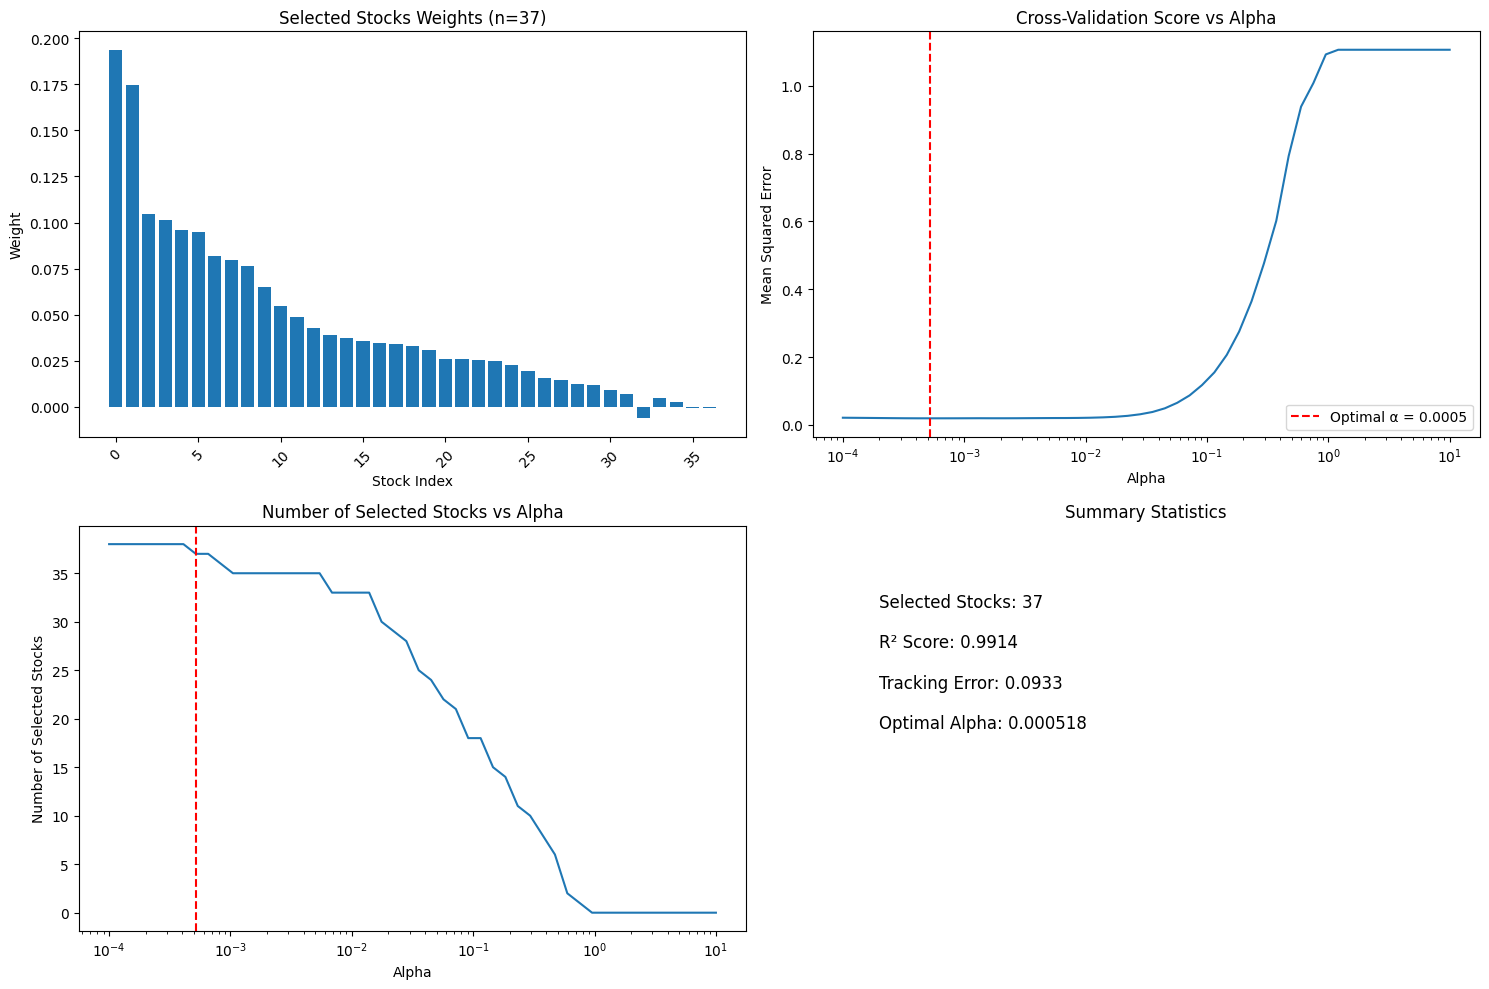

{'selected_stocks': ['ACA.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'BN.PA', 'BNP.PA', 'CA.PA', 'CAP.PA', 'CS.PA', 'DG.PA', 'DSY.PA', 'EL.PA', 'ENGI.PA', 'ERF.PA', 'GLE.PA', 'HO.PA', 'KER.PA', 'LR.PA', 'MC.PA', 'ML.PA', 'MT.AS', 'OR.PA', 'ORA.PA', 'PUB.PA', 'RI.PA', 'RMS.PA', 'RNO.PA', 'SAF.PA', 'SAN.PA', 'SGO.PA', 'STLAP.PA', 'STMPA.PA', 'SU.PA', 'TEP.PA', 'VIE.PA', 'VIV.PA', 'WLN.PA'], 'weights':        stock    weight
18     MC.PA  0.193849
32     SU.PA  0.174758
27    SAF.PA  0.104627
2     AIR.PA  0.101116
28    SAN.PA  0.095958
8      CS.PA  0.094891
5     BNP.PA  0.081759
11     EL.PA  0.079884
1      AI.PA  0.076106
25    RMS.PA  0.065208
21     OR.PA  0.054890
30  STLAP.PA  0.048499
12   ENGI.PA  0.042891
9      DG.PA  0.039083
7     CAP.PA  0.037454
20     MT.AS  0.035418
17     LR.PA  0.034713
4      BN.PA  0.033823
16    KER.PA  0.033137
29    SGO.PA  0.031005
22    ORA.PA  0.026070
14    GLE.PA  0.025855
31  STMPA.PA  0.025352
15     HO.PA  0.024657
10    DSY.PA  0.022614
33    TE

In [50]:
print(run_analysis(value_df))

In [39]:
model = sparse_portfolio_selection(value_df)

def rolling_backtest(data):
    # Step 1: The goal is to use the first 6 months of the available data (24Month period available) (example month 1-6)
    x_train, y_train = sparse_portfolio_selection(value_df) # TO COMPLETE).  
    
    # Step 2: use the prediction of stock selection adn allocation to predict the 3 months following the training (example: month 7-9)
    
    # Store each stock name and weight allocation
    
    # Step 3: do it again to train on 6 months (example 3-9) to predict now the period from 10-12) and so on. 
    
    # Step 4 plot the back test vs the index, add colors to show training periods and the associated predicted period
results_df = pd.DataFrame({
    'Stock': list(model['selected_stocks']),
    'Weight': list(model['weights']['weight'])
})

Data shape: (255, 38)
Number of stocks: 38
Number of time periods: 255


In [40]:
print(list(model['selected_stocks']))
print(list(model['weights']['weight']))

['ACA.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'BN.PA', 'BNP.PA', 'CA.PA', 'CAP.PA', 'CS.PA', 'DG.PA', 'DSY.PA', 'EL.PA', 'ENGI.PA', 'ERF.PA', 'GLE.PA', 'HO.PA', 'KER.PA', 'LR.PA', 'MC.PA', 'ML.PA', 'MT.AS', 'OR.PA', 'ORA.PA', 'PUB.PA', 'RI.PA', 'RMS.PA', 'RNO.PA', 'SAF.PA', 'SAN.PA', 'SGO.PA', 'STLAP.PA', 'STMPA.PA', 'SU.PA', 'TEP.PA', 'VIE.PA', 'VIV.PA', 'WLN.PA']
[0.1938492112634493, 0.1747577685191388, 0.10462665820685003, 0.10111579819126984, 0.09595825372703395, 0.0948913966476103, 0.08175921928480794, 0.07988392134955952, 0.07610585386929937, 0.0652084529758748, 0.05488999539370483, 0.048498931112331924, 0.04289116030673889, 0.0390830221006405, 0.03745378676226958, 0.03541774931402908, 0.03471348733882562, 0.03382264861861682, 0.03313663383774768, 0.031005055287326354, 0.026069621186459162, 0.025855453918051288, 0.025351729241709132, 0.02465740703059867, 0.022614262330256298, 0.01926715470929854, 0.015717638494140755, 0.014546741804406436, 0.012528330302762788, 0.011570830002897003, 0.

Data shape: (125, 38)
Number of stocks: 38
Number of time periods: 125
Data shape: (126, 38)
Number of stocks: 38
Number of time periods: 126


/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


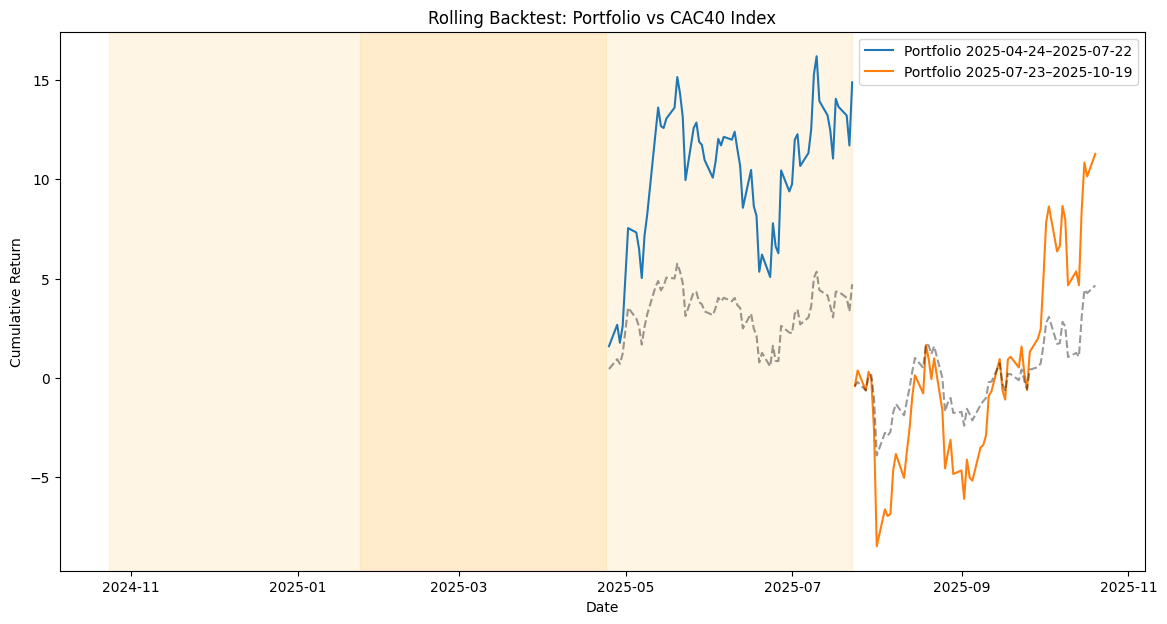

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def rolling_backtest(value_df, train_months=6, test_months=3):
    # Ensure DataFrame sorted by date
    value_df = value_df.sort_values('date').reset_index(drop=True)

    dates = pd.to_datetime(value_df['date'].unique(), utc = True)

    date_windows = []
    results = []

    total_months = len(dates) // 21   # approx trading days per month

    # Move in steps of the test period
    for start in range(0, len(dates)-(train_months+test_months)*21+1, test_months*21):
        # Define train and test periods using index slicing, assuming ~21 trading days per month
        train_start = start
        train_end = start + train_months*21
        test_end = train_end + test_months*21

        train_dates = dates[train_start:train_end]
        test_dates = dates[train_end:test_end]
        if len(test_dates) == 0:
            break

        train_df = value_df[value_df['date'].isin(train_dates)]
        test_df = value_df[value_df['date'].isin(test_dates)]

        # Run your model
        model = sparse_portfolio_selection(train_df)
        selected_stocks = model['selected_stocks']
        weights = model['weights']
        
        # Save stocks, weights, and periods
        results.append({
            'train_period': (train_dates[0], train_dates[-1]),
            'test_period': (test_dates[0], test_dates[-1]),
            'selected_stocks': selected_stocks,
            'weights': weights,
            'test_dates': test_dates
        })
        
        # Prediction: apply weights to test period stock returns to get predicted portfolio performance
        # Prepare test period returns as a DataFrame
        test_returns = test_df[test_df['name'].isin(selected_stocks)].pivot(index='date', columns='name', values='daily_return_pct')
        # Align weights with columns
        weights_aligned = [weights['weight'].loc[weights['stock'] == stock].values[0] if stock in weights['stock'].values else 0 for stock in test_returns.columns]
        portfolio_returns = (test_returns.fillna(0) * weights_aligned).sum(axis=1)
        # Index returns (assuming 'CAC40' is in column 'name')
        index_returns = test_df[test_df['name'] == 'CAC40'].set_index('date')['daily_return_pct']

        # Store for performance plotting
        results[-1]['portfolio_returns'] = portfolio_returns
        results[-1]['index_returns'] = index_returns

    # Step 4: Plotting performance
    plt.figure(figsize=(14, 7))
    all_portfolio = []
    all_index = []
    x = []
    for r in results:
        # Align date indices
        dates = r['test_dates']
        pr = r['portfolio_returns'].reindex(dates).fillna(0).cumsum()
        ir = r['index_returns'].reindex(dates).fillna(0).cumsum()
        all_portfolio.append(pr)
        all_index.append(ir)
        x.extend(dates)
        plt.plot(dates, pr, label=f'Portfolio {r["test_period"][0].date()}–{r["test_period"][1].date()}')
        plt.plot(dates, ir, color='black', linestyle='--', alpha=0.4)
        plt.legend()

        # Highlight training period
        plt.axvspan(r['train_period'][0], r['train_period'][1], color='orange', alpha=0.1)
    
    plt.legend()
    plt.title('Rolling Backtest: Portfolio vs CAC40 Index')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.show()
    
    # Collect all stock/weight info as a DataFrame for inspection if needed
    record_df = pd.DataFrame([
        {'TrainStart': r['train_period'][0], 'TrainEnd': r['train_period'][1],
         'TestStart': r['test_period'][0],  'TestEnd': r['test_period'][1],
         'Stocks': r['selected_stocks'],    'Weights': r['weights']}
        for r in results
    ])
    return record_df

# Example call
record_df = rolling_backtest(value_df)


In [42]:
value_df['date'].max

<bound method Series.max of 0       2024-10-24 00:00:00+02:00
1       2024-10-25 00:00:00+02:00
2       2024-10-28 00:00:00+01:00
3       2024-10-29 00:00:00+01:00
4       2024-10-30 00:00:00+01:00
                  ...            
9979    2025-10-20 00:00:00+02:00
9980    2025-10-21 00:00:00+02:00
9981    2025-10-22 00:00:00+02:00
9982    2025-10-23 00:00:00+02:00
9983    2025-10-24 00:00:00+02:00
Name: date, Length: 9984, dtype: object>